In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Domestic', 'Government', min_assets=.8)
equities = screen_funds('Equities', 'Domestic', 'Large-Cap', min_assets=.8)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 64, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

22 92
from 2019-04-18 to 2019-07-19 - 114


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

105


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
EDV,60,0.162977,0.320638,0.483537,10.268537,4.117647
MTUM,60,0.148961,0.334922,0.421069,9.196521,2.859384
VGLT,60,0.123438,0.231164,0.499653,7.845673,2.936891
TLT,60,0.123419,0.236848,0.487578,7.808488,3.084717
USMV,60,0.122836,0.269379,0.426533,7.337667,2.180427
SPTL,60,0.122648,0.228036,0.503042,7.738045,2.930501
SPLV,60,0.116176,0.280218,0.386268,6.326355,2.660443
FPX,60,0.113120,0.385043,0.273174,7.260390,5.445800
ADX,60,0.100692,0.328709,0.282181,6.586257,5.318352


evicted VTIP 0.892 -0.070
evicted SCHR 0.866 -0.480
evicted SCHP 0.778 -0.305
evicted CET 0.816 -0.360
evicted VMBS 0.826 -0.284
evicted USMV 0.810 -0.346
retry backlogs ['DGRW', 'ITOT', 'IVE', 'GOVT', 'VONG', 'VYM', 'DLN', 'VV', 'SPY', 'VOO', 'MGV', 'SPLV', 'MGC', 'RSP', 'SCHO', 'VGSH', 'TLT', 'GSLC', 'TDTT', 'QQQ', 'IYY', 'STIP', 'SPTM', 'SCHB', 'DSI', 'SCHV', 'TIP', 'VOOG', 'IPE', 'VONE', 'SPTL', 'VTI', 'IVW', 'SPYG', 'IEF', 'TLH', 'VUG', 'FNDX', 'XLG', 'VTV', 'IEI', 'IWV', 'IVV', 'SHY', 'IWB', 'SPLG', 'ONEQ', 'VOOV', 'SCHX', 'IUSG', 'SCHK', 'VONV', 'OEF', 'MGK', 'SPHQ', 'PRF', 'SUSA', 'EDV', 'SDY', 'VGIT', 'NOBL', 'LRGF', 'FEX', 'MBB', 'IUSV', 'VIG', 'JHML', 'DHS', 'FVD', 'DGRO', 'IWY', 'HDV', 'QUAL', 'IWD', 'FTCS', 'JKD', 'SPTS', 'PKW', 'IWF', 'FTC', 'RPG', 'TILT', 'CFO', 'SPYV', 'DTN', 'SCHG', 'FV', 'MOAT', 'DVY', 'PWV', 'DIA', 'FDL', 'FPX', 'JKE', 'RWL', 'USA', 'MTUM'] at 0.905/-0.51 - 0.847
evicted STIP 0.888 -0.072
evicted SPLV 0.880 -0.247
evicted IPE 0.801 -0.246
evicted SPT

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,60.0,0.114745,0.126979,-0.324787,0.039514,0.135756,0.207154,0.389740,0.841147,7.337223,1.612460
SPTL,60.0,0.122648,0.228036,-0.591965,0.016214,0.099025,0.241494,0.743020,0.503042,7.738045,2.930501
ADX,60.0,0.100692,0.328709,-0.664982,-0.117502,0.105431,0.295651,1.029532,0.282181,6.586257,5.318352


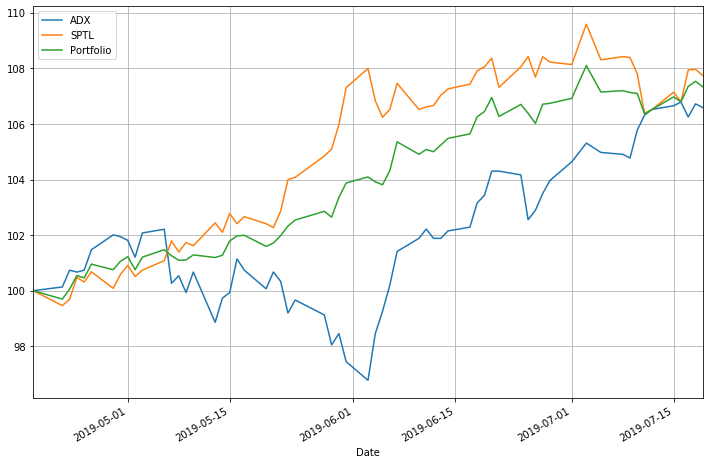

In [4]:
bounds = .08, .12
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(max_count=2, _lambda=1, bounds=bounds)
quote.setup_mask(['ADX', 'SPTL'])
sd.update(quote.optimize_portfolio(max_count=2, _lambda=1, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(max_count=2, _lambda=1, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

{'EDV': 0.502, 'MTUM': 0.498}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,60.0,0.155622,0.176318,-0.408760,0.045139,0.181370,0.281136,0.585588,0.837606,9.734673,2.025846
EDV,60.0,0.162977,0.320638,-0.834994,0.020461,0.133080,0.324121,1.027232,0.483537,10.268537,4.117647
MTUM,60.0,0.148961,0.334922,-0.476787,-0.078731,0.143408,0.367320,1.172438,0.421069,9.196521,2.859384


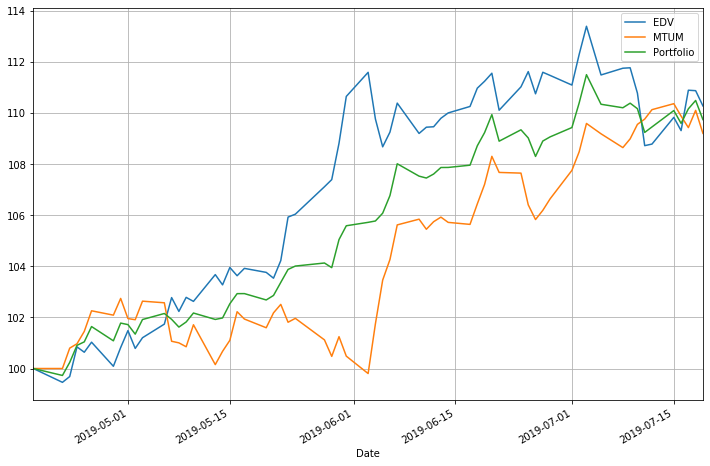

In [6]:
quote.setup_mask(['EDV', 'MTUM'])
ratio, *_ = quote.find_optimal_ratio()
print(ratio)
quote.graph(ratio)